## Комментарий

Задумывалось сделать так, чтобы всё само перебиралось и строилось с любым количеством гиперпараметров и любым алгоритмом. Но не хватило знаний в питоне и времени, поэтому получился "суррогат" :) возможно, в следующих работах смогу доделать

### Инициализация

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'c:/Program Files (x86)/Graphviz2.38/bin/'

import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from matplotlib import pyplot as plt

In [7]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

In [8]:
from sklearn.metrics import roc_auc_score

### Загрузка данных

In [9]:
train = pd.read_csv('03_santander_train.csv', index_col='ID')

In [10]:
test = pd.read_csv('03_santander_test.csv', index_col='ID')

In [11]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [12]:
test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [13]:
train.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Data columns (total 370 columns):
var3                             76020 non-null int64
var15                            76020 non-null int64
imp_ent_var16_ult1               76020 non-null float64
imp_op_var39_comer_ult1          76020 non-null float64
imp_op_var39_comer_ult3          76020 non-null float64
imp_op_var40_comer_ult1          76020 non-null float64
imp_op_var40_comer_ult3          76020 non-null float64
imp_op_var40_efect_ult1          76020 non-null float64
imp_op_var40_efect_ult3          76020 non-null float64
imp_op_var40_ult1                76020 non-null float64
imp_op_var41_comer_ult1          76020 non-null float64
imp_op_var41_comer_ult3          76020 non-null float64
imp_op_var41_efect_ult1          76020 non-null float64
imp_op_var41_efect_ult3          76020 non-null float64
imp_op_var41_ult1                76020 non-null float64
imp_op_var39_efect_ult1          76020 non-null float

### Подготовка данных

In [14]:
y = list(train['TARGET'])

In [15]:
train = train.drop('TARGET', axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [17]:
def plot(X, Y, mdl_name, hp_name):
    %matplotlib inline
    plt.figure(figsize=(10, 5))
    plt.plot(X, Y)
    plt.ylabel('ROC AUC')
    plt.xlabel(hp_name)
    plt.grid(True)
    plt.title('ROC-AUC of {0} depends on {1}'.format(mdl_name, hp_name))
    plt.ylim((-0.01, 1.01))

### Подбор моделей

#### Инициализация моделей

In [18]:
cpu_count = -1

In [19]:
models = {
    'dtc': {
        'HyperParams': [
            {
                'name': 'max_depth',
                'values': [1, 2, 3, 5, 8, 13, 21, 34, 55]
            }
        ],
        'res': []
    },
    'knc': {
        'HyperParams': [
            {
                'name': 'n_neighbors',
                'values': [1, 2, 3, 5, 8, 13, 21, 34, 55]
            }
        ],
        'res': []
    },
    'lr': {
        'HyperParams': [
            {
                'name': 'penalty',
                'values': ['l1', 'l2']
            },
            {
                'name': 'C',
                'values': [1/8, 1/5, 1/3, 1/2, 1, 1.3, 1.65, 2, 3, 5, 8]
            }
        ],
        'res': []
    },
}

##### DecisionTreeClassifier

In [20]:
mdl_name = 'dtc'

In [21]:
models[mdl_name]['res'].append({ 'X': [], 'Y': [] })
n_rows = len(models[mdl_name]['HyperParams'])

# последний параметр важен: его постараемся рисовать в одну линию для наглядности
last_hp_name = models[mdl_name]['HyperParams'][n_rows - 1]['name']

print('Код модели: {}, зависимость по параметру: {}, количество значений: {}'.format(
    mdl_name,
    last_hp_name,
    len(models[mdl_name]['HyperParams'][n_rows - 1]['values'])
))

Код модели: dtc, зависимость по параметру: max_depth, количество значений: 9


In [22]:
def initMDL(params):
    return DecisionTreeClassifier(**params)

In [23]:
cur_i = -1 #номер текущего параметра
for hp in models[mdl_name]['HyperParams']:
    cur_i += 1
    if hp['name'] == last_hp_name:
        for hp_val in hp['values']:
            print('Обучаем {0} для {1} = {2}'.format(mdl_name, hp['name'], hp_val))
            mdl = initMDL({hp['name']: hp_val})
            mdl.fit(X_train, y_train)
            models[mdl_name]['res'][cur_i]['X'].append(hp_val)
            models[mdl_name]['res'][cur_i]['Y'].append(roc_auc_score(y_test, mdl.predict_proba(X_test)[:,1]))

Обучаем dtc для max_depth = 1
Обучаем dtc для max_depth = 2
Обучаем dtc для max_depth = 3
Обучаем dtc для max_depth = 5
Обучаем dtc для max_depth = 8
Обучаем dtc для max_depth = 13
Обучаем dtc для max_depth = 21
Обучаем dtc для max_depth = 34
Обучаем dtc для max_depth = 55


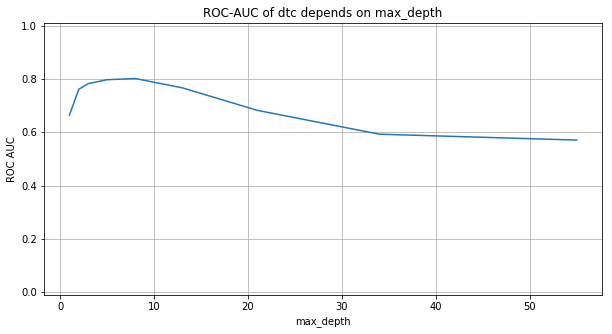

In [24]:
plot(models[mdl_name]['res'][0]['X'], models[mdl_name]['res'][0]['Y'], mdl_name, hp['name'])

##### KNeighborsClassifier

In [25]:
mdl_name = 'knc'
models[mdl_name]['res'].append({ 'X': [], 'Y': [] })
n_rows = len(models[mdl_name]['HyperParams'])

# последний параметр важен: его постараемся рисовать в одну линию для наглядности
last_hp_name = models[mdl_name]['HyperParams'][n_rows - 1]['name']

print('Код модели: {}, зависимость по параметру: {}, количество значений: {}'.format(
    mdl_name,
    last_hp_name,
    len(models[mdl_name]['HyperParams'][n_rows - 1]['values'])
))

Код модели: knc, зависимость по параметру: n_neighbors, количество значений: 9


In [26]:
def initMDL(params):
    return KNeighborsClassifier(**params)

In [27]:
cur_i = -1 #номер текущего параметра
for hp in models[mdl_name]['HyperParams']:
    cur_i += 1
    if hp['name'] == last_hp_name:
        for hp_val in hp['values']:
            print('Обучаем {0} для {1} = {2}'.format(mdl_name, hp['name'], hp_val))
            mdl = initMDL({hp['name']: hp_val, 'n_jobs': cpu_count})
            mdl.fit(X_train, y_train)
            models[mdl_name]['res'][cur_i]['X'].append(hp_val)
            models[mdl_name]['res'][cur_i]['Y'].append(roc_auc_score(y_test, mdl.predict_proba(X_test)[:,1]))

Обучаем knc для n_neighbors = 1
Обучаем knc для n_neighbors = 2
Обучаем knc для n_neighbors = 3
Обучаем knc для n_neighbors = 5
Обучаем knc для n_neighbors = 8
Обучаем knc для n_neighbors = 13
Обучаем knc для n_neighbors = 21
Обучаем knc для n_neighbors = 34
Обучаем knc для n_neighbors = 55


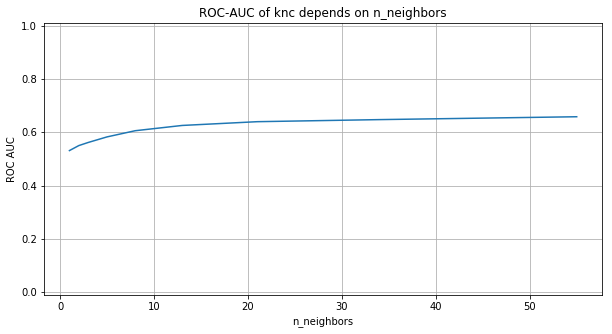

In [28]:
plot(models[mdl_name]['res'][0]['X'], models[mdl_name]['res'][0]['Y'], mdl_name, hp['name'])

##### LogisticRegression 

In [29]:
mdl_name = 'lr'
models[mdl_name]['res'] = [
#    {
#        X: [],
#        Y: [],
#        otherParams: {
#            'name': 'value'
#        }
#    }
]
n_rows = len(models[mdl_name]['HyperParams'])

# последний параметр важен: его рисуем на графике. Остальные параметры определяют количество графиков
last_hp_name = models[mdl_name]['HyperParams'][n_rows - 1]['name']

print('Код модели: {}, зависимость по параметру: {}, количество значений: {}'.format(
    mdl_name,
    last_hp_name,
    len(models[mdl_name]['HyperParams'][n_rows - 1]['values'])
))

Код модели: lr, зависимость по параметру: C, количество значений: 11


In [30]:
def initMDL(params):
    return LogisticRegression(**params)

In [31]:
cur_i = -1 #номер текущего параметра
params = {
    'n_jobs': cpu_count
}
for hp in models[mdl_name]['HyperParams']:
    cur_i += 1
    if hp['name'] == last_hp_name:
        for hp_val in hp['values']:
            for res in models[mdl_name]['res']:
                print('Обучаем {0} для {1}, {2} = {3}'.format(mdl_name, res['otherParams'], hp['name'], hp_val))
                mdl = initMDL({
                    hp['name']: hp_val,
# эти параметры почему-то не работают
#                    'n_jobs': cpu_count,
#                    'solver': 'saga',
                    list(res['otherParams'].keys())[0]: list(res['otherParams'].values())[0]
                })
                mdl.fit(X_train, y_train)
                res['X'].append(hp_val)
                res['Y'].append(roc_auc_score(y_test, mdl.predict_proba(X_test)[:,1]))
    else:
        for hp_val in hp['values']:
            # в данной реализации рассчитано только на 1 дополнительнй гиперпараметр. Для нескольких работать не будет
            models[mdl_name]['res'].append({
                'X': [],
                'Y': [],
                'otherParams': {
                    hp['name']: hp_val
                }
            })


Обучаем lr для {'penalty': 'l1'}, C = 0.125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Обучаем lr для {'penalty': 'l2'}, C = 0.125
Обучаем lr для {'penalty': 'l1'}, C = 0.2
Обучаем lr для {'penalty': 'l2'}, C = 0.2
Обучаем lr для {'penalty': 'l1'}, C = 0.3333333333333333
Обучаем lr для {'penalty': 'l2'}, C = 0.3333333333333333
Обучаем lr для {'penalty': 'l1'}, C = 0.5
Обучаем lr для {'penalty': 'l2'}, C = 0.5
Обучаем lr для {'penalty': 'l1'}, C = 1
Обучаем lr для {'penalty': 'l2'}, C = 1
Обучаем lr для {'penalty': 'l1'}, C = 1.3
Обучаем lr для {'penalty': 'l2'}, C = 1.3
Обучаем lr для {'penalty': 'l1'}, C = 1.65
Обучаем lr для {'penalty': 'l2'}, C = 1.65
Обучаем lr для {'penalty': 'l1'}, C = 2
Обучаем lr для {'penalty': 'l2'}, C = 2
Обучаем lr для {'penalty': 'l1'}, C = 3
Обучаем lr для {'penalty': 'l2'}, C = 3
Обучаем lr для {'penalty': 'l1'}, C = 5
Обучаем lr для {'penalty': 'l2'}, C = 5
Обучаем lr для {'penalty': 'l1'}, C = 8
Обучаем lr для {'penalty': 'l2'}, C = 8


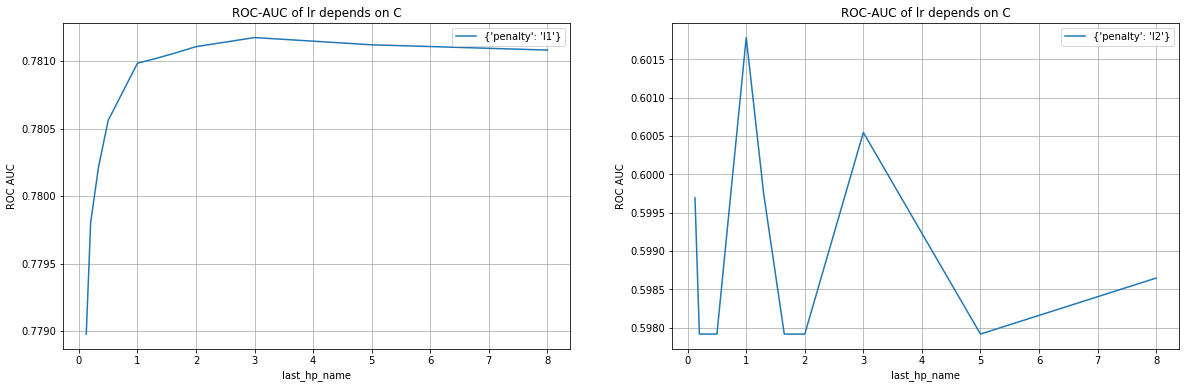

In [49]:
%matplotlib inline
i = 0
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
for res in models[mdl_name]['res']:
    plt.plot()
    ax[i].plot(res['X'], res['Y'], label=res['otherParams'])
    ax[i].legend()
    ax[i].set(xlabel='last_hp_name', ylabel='ROC AUC')
    ax[i].grid(True)
    ax[i].set_title('ROC-AUC of {0} depends on {1}'.format(mdl_name, last_hp_name))
    i += 1
